# Boxfill Tutorial

This is an in-depth introduction to the boxfill graphics method in VCS. It breaks down each of the important attributes of the graphics method, how to use them, and what effects they have on your plots.


## Setup

This is just the normal setup for a plot in VCS; we get the data, retrieve a variable, initialize our canvas, and plot a basic boxfill.

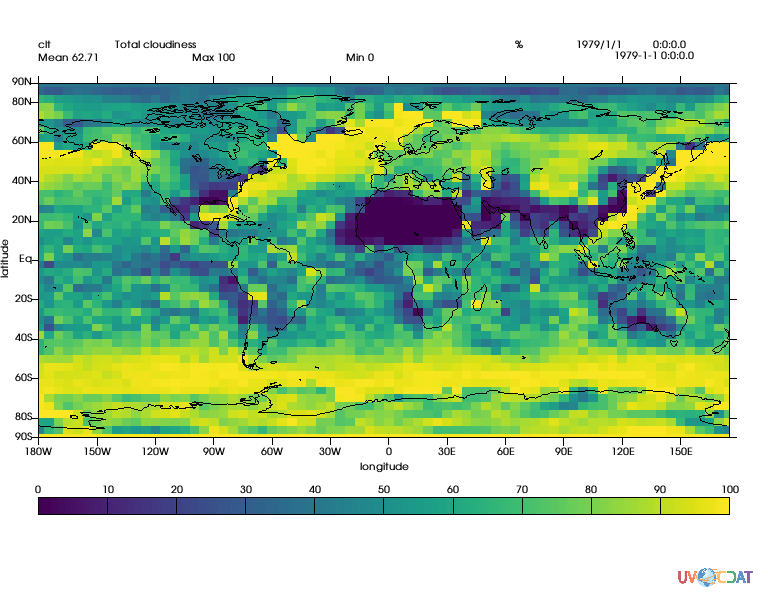

In [1]:
import vcs, cdms2
import os
if not os.path.exists(vcs.sample_data):
    vcs.download_sample_data_files()
f = cdms2.open(os.path.join(vcs.sample_data, "clt.nc"))
s = f('clt')
x = vcs.init(bg=True)
box = vcs.createboxfill()
x.plot(s, box)

> #### Tip 1:
> You can use the list() function on most VCS objects to see what their attributes are

In [2]:
box.list()

---------- Boxfill (Gfb) member (attribute) listings ----------
graphics method = Gfb
name = __boxfill_471349305815982
projection = linear
xticlabels1 = *
xticlabels2 = *
xmtics1 = 
xmtics2 = 
yticlabels1 = *
yticlabels2 = *
ymtics1 =  
ymtics2 =  
datawc_x1 = 1e+20
datawc_y1 =  1e+20
datawc_x2 =  1e+20
datawc_y2 =  1e+20
datawc_timeunits =  days since 2000
datawc_calendar =  135441
xaxisconvert =  linear
yaxisconvert =  linear
boxfill_type =  linear
level_1 =  1e+20
level_2 =  1e+20
levels =  [1e+20, 1e+20]
color_1 =  0
color_2 =  255
fillareacolors =  None
fillareastyle =  solid
fillareaindices =  [1]
fillareaopacity =  []
fillareapixelspacing =  None
fillareapixelscale =  None
legend =  None
ext_1 =  False
ext_2 =  False
missing =  (0.0, 0.0, 0.0, 100.0)


## The Attributes

So, let's begin working our way through the attributes in the `list()` output.


### box.projection

Projections change the mappings of spherical coordinates (longitude and latitude) to cartesian coordinates (X/Y). The `"linear"` projection maps each degree of lon/lat to an X/Y point directly, so each degree is equidistant, but that does cause some distortion of landmasses/data in parts of the globe. To get a good look at the north/south pole, a better projection to use is the `"polar"` projection. Each projection can be customized to get the exact mapping you want, but that's a subject for a different tutorial.

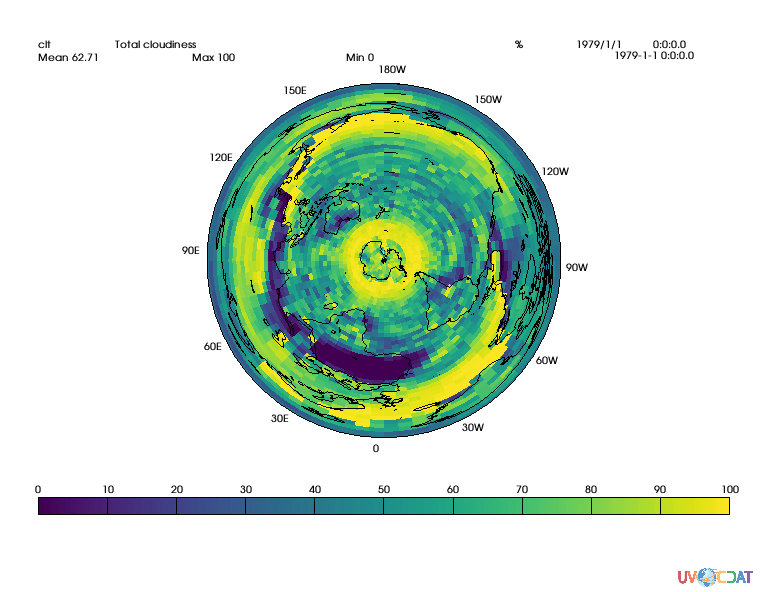

In [3]:
box.projection = "polar"
x.clear()
x.plot(s, box)

### box.(x|y)ticlabels(1|2)

These attributes control where tick marks appear on the axes of the plot. You pass in a dictionary that maps axis values (lon/lat) to string labels.

> *Note:* You can also set ticlabels to the name of a vcs "List", which are a series of predefined mappings that you can look at using `vcs.listelements("list")`


VCS will determine the correct position (in X/Y) for your axis label and tick mark to appear, and place them there. In the below example, we'll set the positions for a few nice landmarks in lon/lat, and be able to see their locations on the map. `xticlabels1` controls tick marks on the bottom X axis; `xticlabels2` controls the marks on the top of the axis. `yticlabels1` controls the left Y axis, and `yticlabels2` controls the right Y axis.

> #### Tip 2:
> `xticlabels2` and `yticlabels2` don't display labels when using the default template in VCS. To make them appear, you have to create a new template (`vcs.createtemplate()`) and set the `xlabel2` and/or `ylabel2` priority to >0 (`xlabel2.priority = 1`). Priority of 0 on a template attribute prevents that attribute from being displayed; a handy way to hide any element of the plot that you don't want displayed!

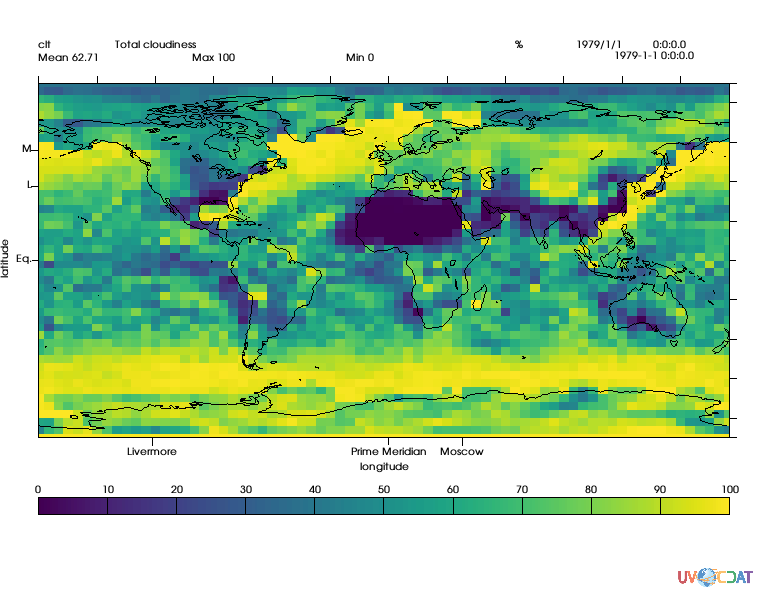

In [4]:
box.projection = "linear"
box.xticlabels1 = {0: "Prime Meridian", -121.7680: "Livermore", 37.6173: "Moscow"}
box.yticlabels1 = {0: "Eq.", 37.6819: "L", 55.7558: "M"}
x.clear()
x.plot(s, box)

### box.(x|y)mtics(1|2)

The **m**tics are "mini" ticks; they are meant to be smaller, intermediate tickmarks without labels that show up between the larger ticks. The default template does not display them; you have to use a custom template and set their priority to 1. Once again, `xmtics1` points to the bottom, `xmtics2` the top, `ymtics1` the left, and `ymtics2` the right. Below, we use the names of some of the predefined VCS lists that were mentioned in the previous section.

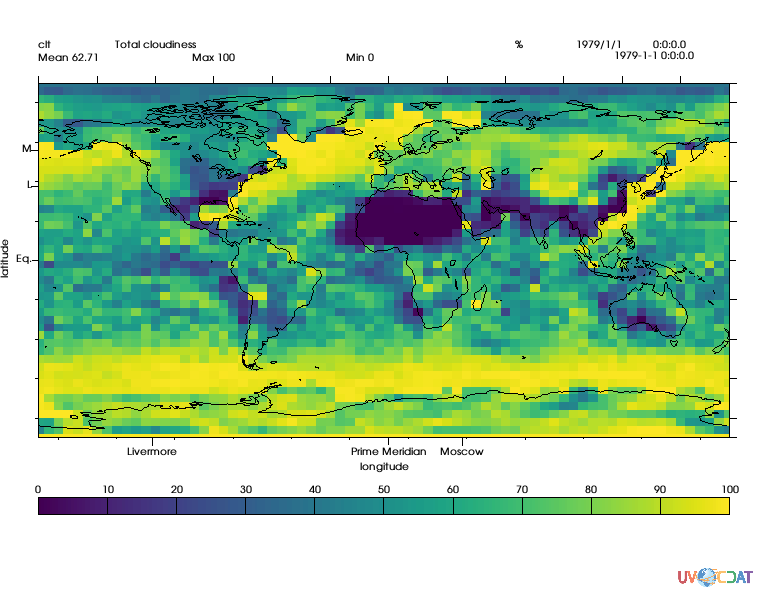

In [5]:
box.xmtics1 = "lon30"  # Every 30deg
box.ymtics1 = "lat20"  # Every 20deg
template = vcs.createtemplate()
template.xmintic1.priority = 1
template.ymintic1.priority = 1
x.clear()
x.plot(s, box, template)

### box.datawc_(x|y)(1|2)

The `datawc_*` attributes control the "world coordinates" of the plot. That is, they describe the section of the data to display in the plot. You specify values in the coordinate space of the axes of your data; for most of us, that means lon/lat values. This then allows you to reduce the displayed portion of your data to a specific area. Here, we'll zoom in on Livermore, and use the mini ticks to show the exact point that Livermore is located at. X1 is the start of the x axis, X2 is the end of the x axis; the same applies to Y1 and Y2.

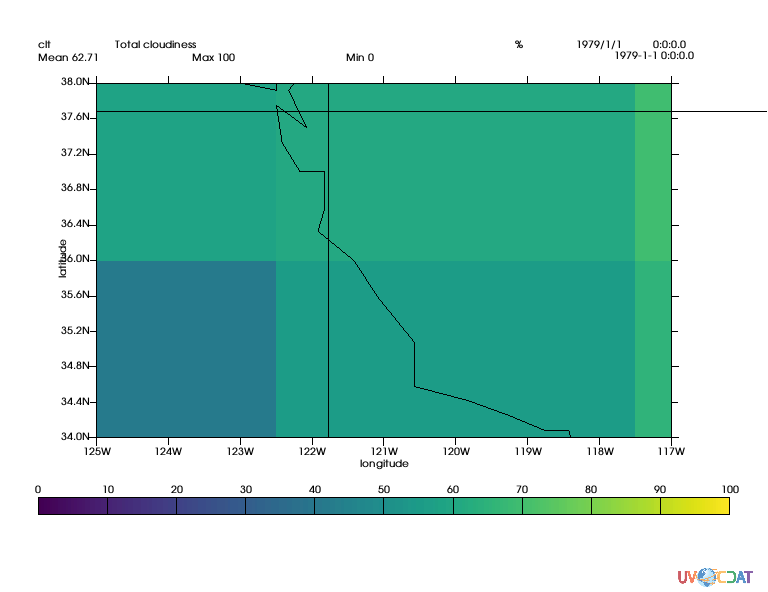

In [6]:
box.datawc_x1 = -125
box.datawc_x2 = -117
box.datawc_y1 = 34
box.datawc_y2 = 38
box.xmtics1 = box.xticlabels1
box.ymtics1 = box.yticlabels1
box.xticlabels1 = "*"
box.yticlabels1 = "*"
template.xmintic1.y1 = template.data.y1
template.xmintic1.y2 = template.data.y2
template.ymintic1.x1 = template.data.x1
template.ymintic1.x2 = template.data.x2
x.clear()
x.plot(s, box, template, ratio="autot")

> #### Tip 3:
> 1e20 is the "automatic" value for datawc_* attributes, and uses the entire dataset as provided to the plot call.

### box.level_(1|2)

`level_1` and `level_2` control what the minimum and maximum values of data displayed in the plot will be. They allow you to specify the exact range of values to use in the legend of the plot. Values outside of those ranges will be left blank on the plot. To reset them, set them to 1e20.

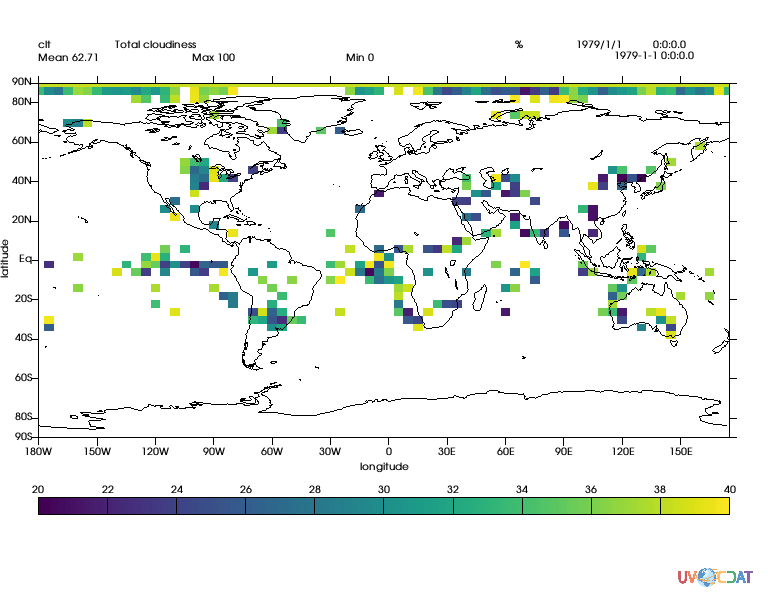

In [7]:
box.datawc_x1 = 1e20
box.datawc_x2 = 1e20
box.datawc_y1 = 1e20
box.datawc_y2 = 1e20
box.xmtics1 = None
box.ymtics1 = None
box.level_1 = 20
box.level_2 = 40
x.clear()
x.plot(s, box, template)

### box.color_(1|2)

`color_1` and `color_2` control which parts of the colormap to use for the plot. It defaults to the full range of the colormap (0-255), but if you use fewer colors, it will break up your data into precisely that many discrete colors. You assign indices from the colormap.

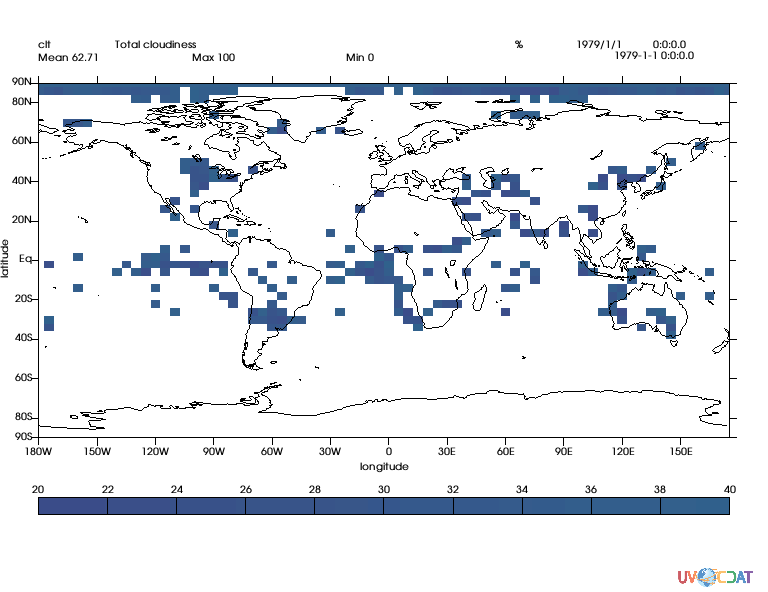

In [8]:
box.color_1 = 60
box.color_2 = 80
x.clear()
x.plot(s, box, template)

### box.boxfill_type

`boxfill_type` allows you to fully customize your boxfill. If you assign a `boxfill_type` of "custom", `level_1`, `level_2`, `color_1`, and `color_2` are ignored, and instead the attributes `levels`, `fillareacolors`, `fillareaindices`, `fillareaopacity`, and `fillareastyle` are used. We'll go into those more below. Since we're now using `levels` instead of the `level_*` and `color_*` attributes, VCS will attempt to break your data values into a nice range with 10-12 colors by default, which you'll learn to override shortly.

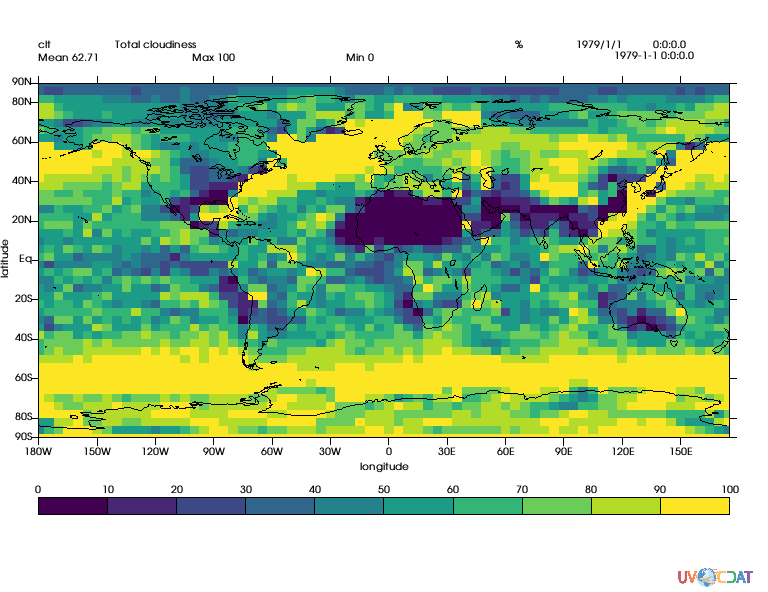

In [9]:
box.level_1 = 1e20
box.level_2 = 1e20
box.color_1 = 0
box.color_2 = 255
box.boxfill_type = "custom"
x.clear()
x.plot(s, box, template)

### box.levels and box.fillareacolors

`levels` describes the bounds for each "bin" that your data will be slotted into. To recreate the above levels, you'd do this:

```
box.levels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
```

`fillareacolors` sets the color for each bin. Usually, the easiest way to choose colors is to let VCS do it for you:

```
box.fillareacolors = vcs.utils.getcolors(box.levels)
```

but you can do it manually as well:

```
box.fillareacolors = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180]
```

You use any of VCS' color syntaxes for setting the colors here:


```
# In order: colormap index, color string, RGB tuple (0-100 for each value), RGBA tuple (0-100 for each value)
box.fillareacolors = [0, "red", (85, 12, 3), (100, 100, 100, 50)]
```

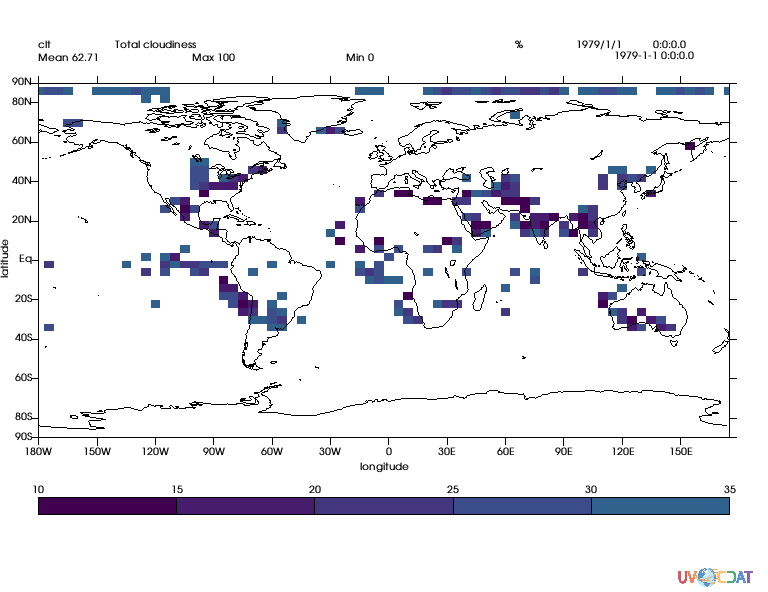

In [10]:
box.levels = [10, 15, 20, 25, 30, 35]
box.fillareacolors = [0, 20, 40, 60, 80]
x.clear()
x.plot(s, box, template)

### box.fillareastyle and box.fillareaindices

If you want even more control of the appearance of your plot, you can use the pattern/hatch system. `fillareastyle` has three possible values: `solid`, `hatch`, and `pattern`. `pattern` will have the same behavior as `hatch`, but be in black/white. `fillareaindices` let you choose what pattern to use for the fill; new patterns are added from time to time, so you will want to experiment and find ones you like.

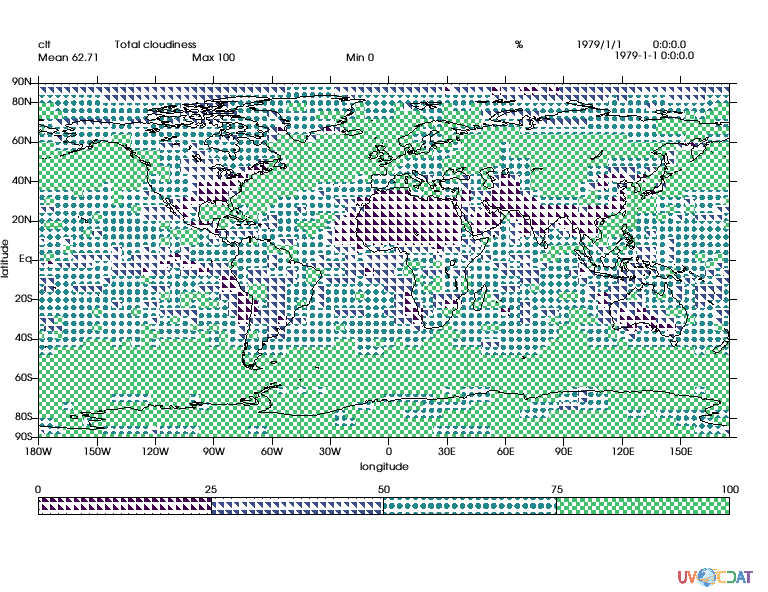

In [11]:
box.levels = [0, 25, 50, 75, 100]
box.fillareacolors = [0, 60, 120, 180]
box.fillareastyle = "hatch"  # or pattern
box.fillareaindices = [1, 2, 3, 4]
x.clear()
x.plot(s, box, template)

### box.fillareaopacity

`fillareaopacity` lets you control the opacity of each of your bins. While you can manually set opacity using the `fillareacolors` ability to use RGBA values (or using a colormap with transparent colors), this will allow you to set the opacity of your bins from a single place. It takes a list of values the length of the number of bins you want, where the values are between 0 and 100 (100 being fully opaque).

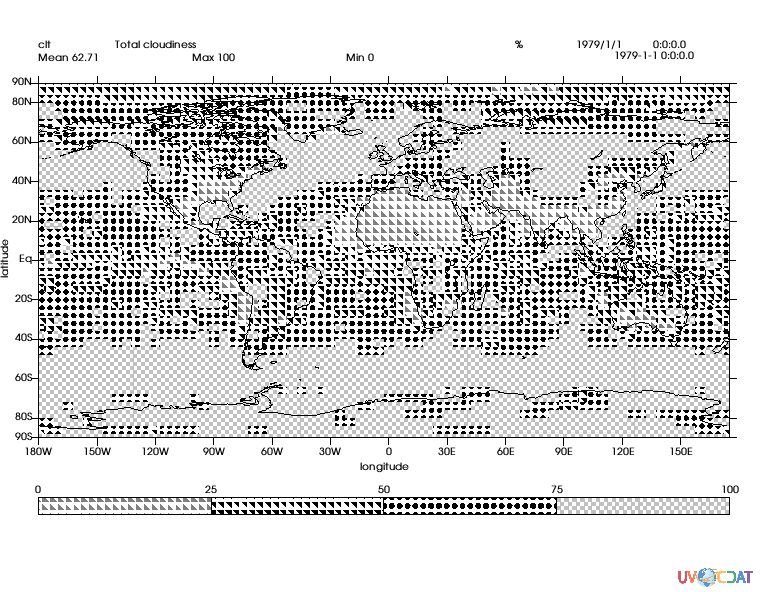

In [12]:
box.fillareaopacity = [50, 100, 100, 25]  # 0-100
box.fillareastyle = "pattern"
x.clear()
x.plot(s, box, template)

### box.legend

`legend` controls which levels are labeled in the legend. You set it to a dictionary that has keys from your range of values of your data, and values of the label you want displayed. VCS will place the labels at the appropriate point above/to the side of the legend.

> #### Tip 4:
> If you set the geometry of the legend (`template.legend.x1`, `template.legend.x2`, `template.legend.y1`, `template.legend.y2`) in the template to be taller than it is wide, the legend will draw itself vertically instead of horizontally (labels will be to the side, and the ticks will be across it in the appropriate direction).

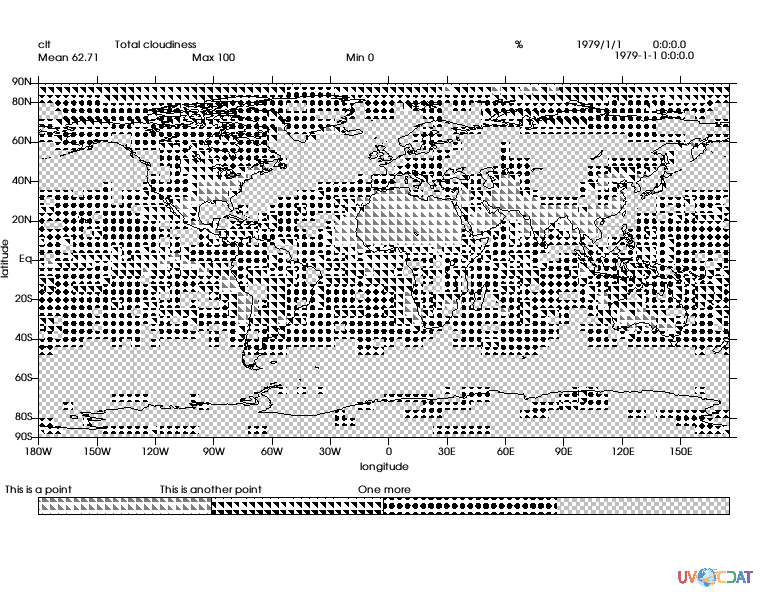

In [13]:
box.legend = {15: "This is a point", 30: "This is another point", 60: "One more"}
x.clear()
x.plot(s, box, template)

### box.ext_1 and box.ext_2

`ext_1` and `ext_2` mark the edge levels as open or closed; if set to true, any values below the lowest level or above the highest will be contained in the lowest or highest level.

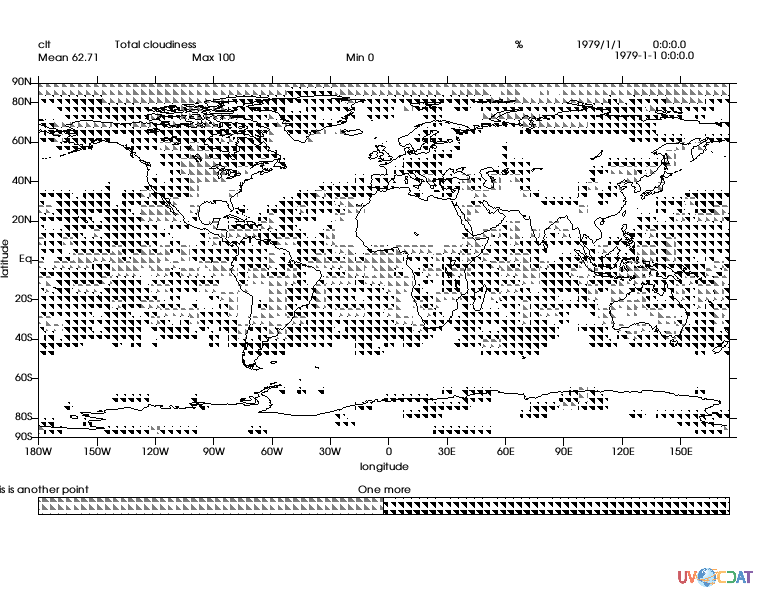

In [14]:
box.ext_1 = True
box.ext_2 = True
box.levels = [25, 50, 75]
box.fillareacolors = [100, 200]
box.fillareaindices = [1, 2]
box.fillareaopacity = [50, 100]
x.clear()
x.plot(s, box, template)

### box.missing

`missing` is the color used for masked out data. A mask can be applied to any variable using the `variable.mask` attribute, or using the `masked` comparison functions in `cdms2.MV2`; a number of other ways (such as using the `fill_value` attribute of a variable in a NetCDF file) will also mark a value as "missing".

/Users/doutriaux1/anaconda2/envs/nightly2/lib/python2.7/site-packages/vcs/VTKPlots.py:1005: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  data[:] = numpy.ma.masked_invalid(data, numpy.nan)


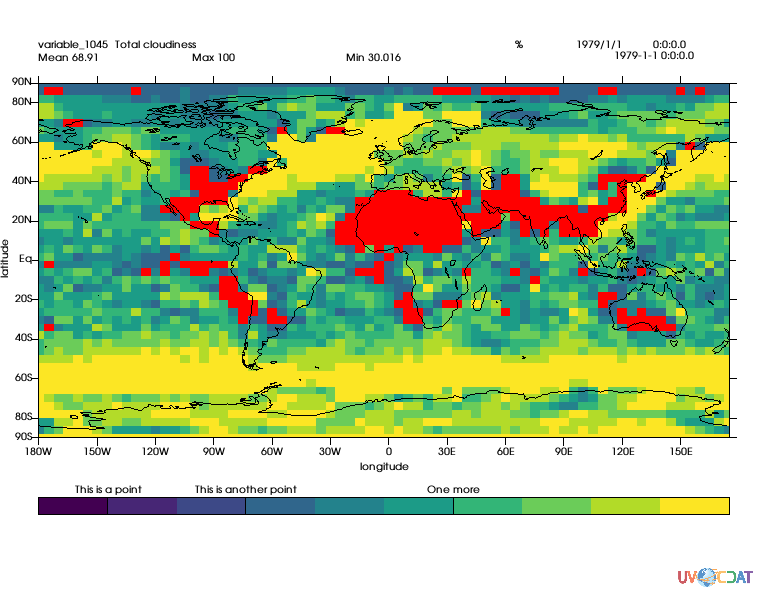

In [15]:
masked = cdms2.MV2.masked_less_equal(s, 30)
box.missing = "red"
box.fillareastyle = "solid"
box.levels = range(0, 101, 10)
box.fillareacolors = vcs.getcolors(box.levels)
box.fillareaindices = [1]
box.fillareaopacity = [100]
box.ext_1 = False
box.ext_2 = False
x.clear()
x.plot(masked, box, template)